In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format=['svg']


ERROR:root:The 'figure_format' trait of an InlineBackend instance must be a unicode string, but a value of ['svg'] <class 'list'> was specified.


In [2]:
db = sqlite3.connect('../../99 Datasets/datasets.db')

query = 'SELECT * FROM house_sales'

df = pd.read_sql_query(query, db)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18448 entries, 0 to 18447
Data columns (total 17 columns):
rowid                       18448 non-null int64
price                       18448 non-null int64
num_bed                     18448 non-null int64
num_bath                    18448 non-null float64
size_house                  18448 non-null int64
size_lot                    18448 non-null int64
num_floors                  18448 non-null float64
is_waterfront               18448 non-null int64
condition                   18448 non-null int64
size_basement               18448 non-null int64
year_built                  18448 non-null int64
renovation_date             18448 non-null int64
zip                         18448 non-null int64
latitude                    18448 non-null float64
longitude                   18448 non-null float64
avg_size_neighbor_houses    18448 non-null int64
avg_size_neighbor_lot       18448 non-null int64
dtypes: float64(4), int64(13)
memory usage: 2.4 MB

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rowid,18448.0,9223.500000,5325.623219,0.000000,4611.750000,9223.500000,13835.250000,1.844700e+04
price,18448.0,542362.371314,372013.519039,78000.000000,321837.500000,450000.000000,648000.000000,7.700000e+06
num_bed,18448.0,3.372615,0.933892,0.000000,3.000000,3.000000,4.000000,3.300000e+01
num_bath,18448.0,2.118888,0.772384,0.000000,1.750000,2.250000,2.500000,8.000000e+00
size_house,18448.0,2083.940915,921.416218,290.000000,1430.000000,1920.000000,2560.000000,1.354000e+04
size_lot,18448.0,15036.024068,41814.548966,520.000000,5050.000000,7600.500000,10625.250000,1.651359e+06
num_floors,18448.0,1.494606,0.540806,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,18448.0,0.007643,0.087092,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,18448.0,3.411698,0.652593,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,18448.0,293.571498,443.607503,0.000000,0.000000,0.000000,570.000000,4.820000e+03


In [5]:
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503


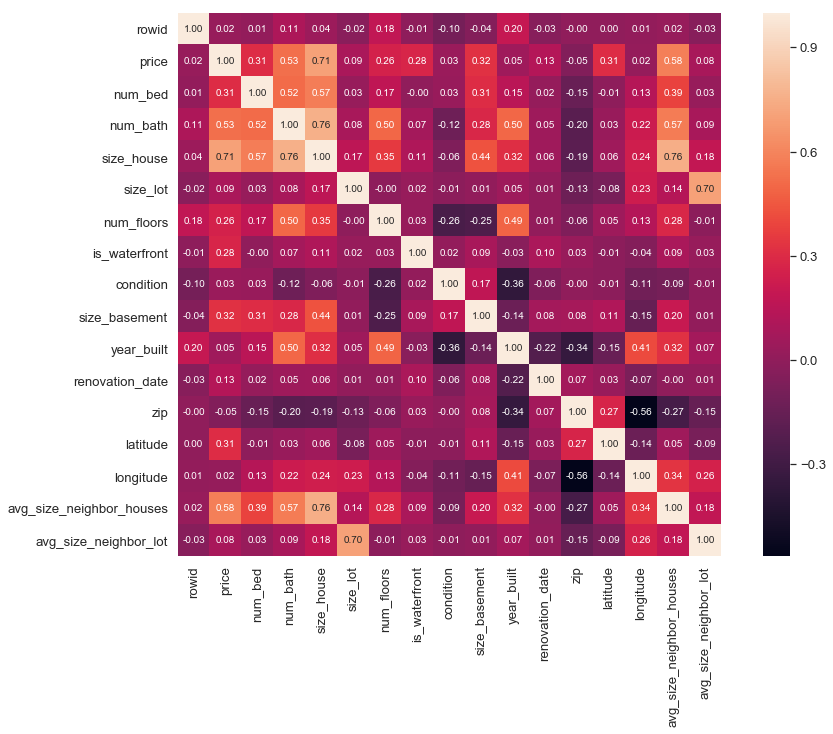

In [6]:
# correlação entre as variáveis - mapa de calor

corrmat = df.corr()
sns.set(font_scale = 1.20)
f, ax = plt.subplots(figsize = (15, 10))
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corrmat.columns, xticklabels=corrmat.columns)

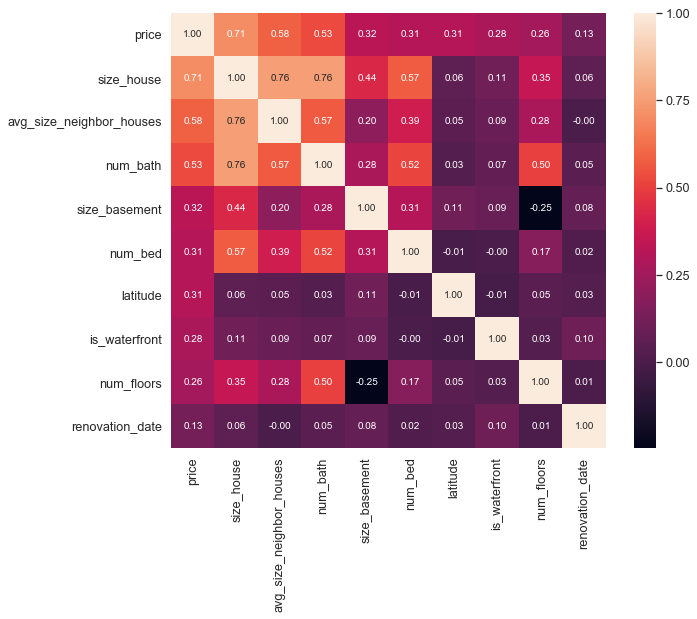

In [7]:
# Identificando as 10 variáveis que mais estão mais correlacionadas com o PRICE

corrmat = df.corr()
cols = corrmat.nlargest(10, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

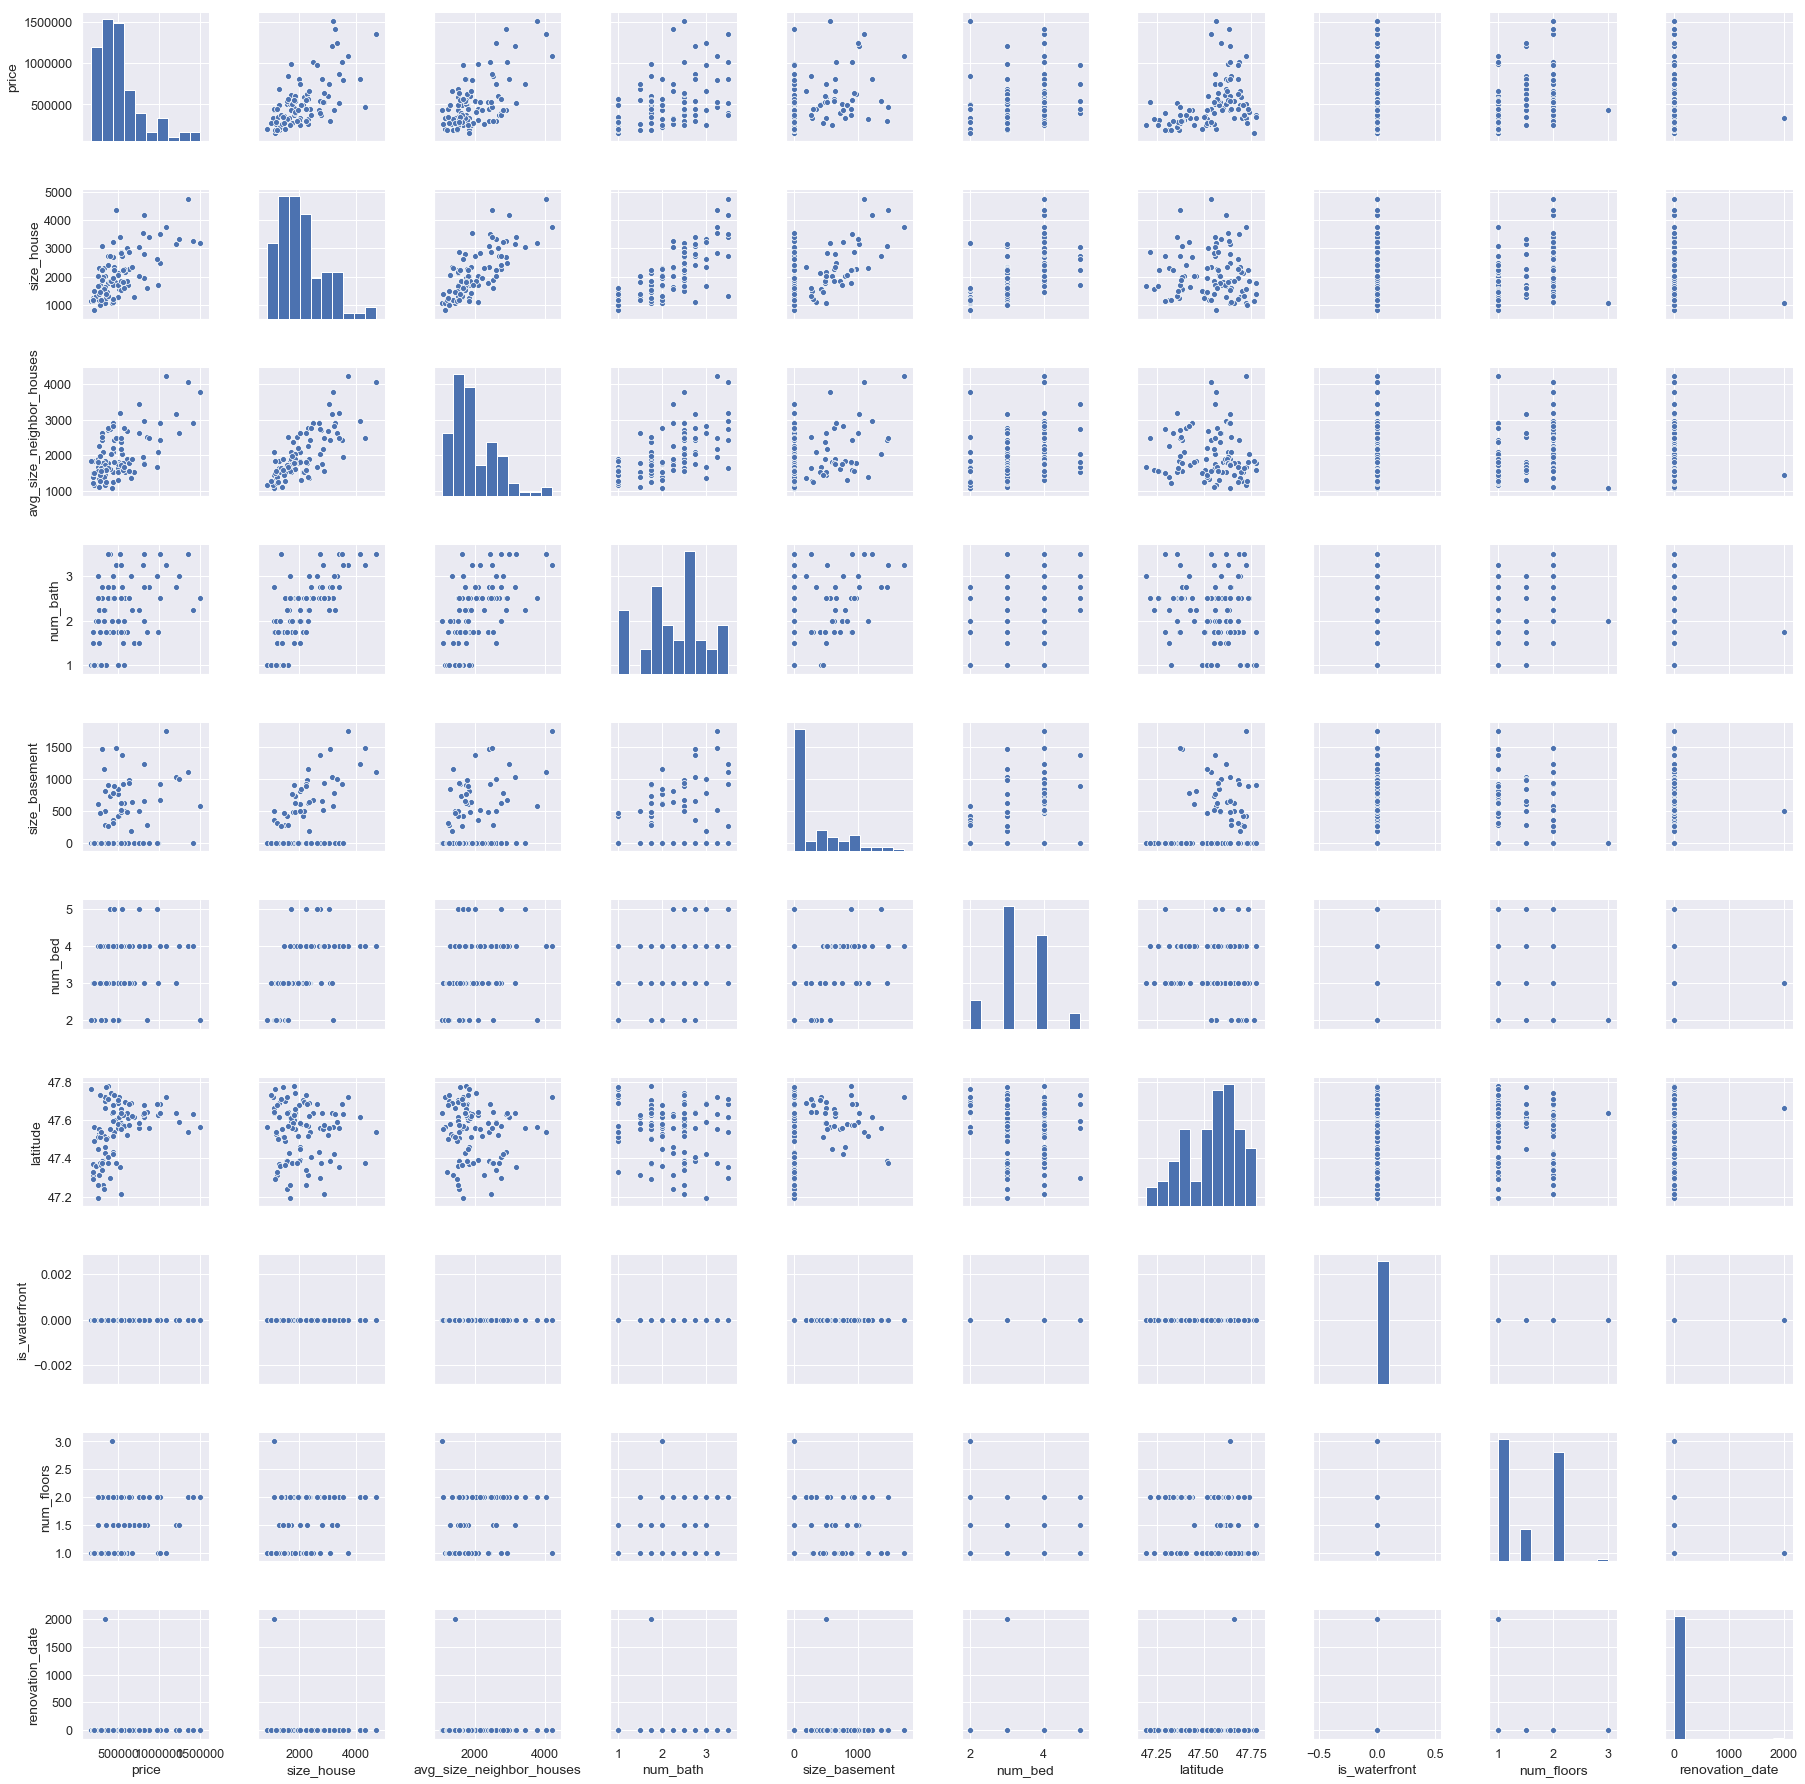

In [8]:
sample = df[cols].sample(100)
sns.pairplot(sample)

In [9]:
# Modelo de regressão

list(df.columns)

['rowid',
 'price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'year_built',
 'renovation_date',
 'zip',
 'latitude',
 'longitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

In [10]:
function1 = '''
price ~
+ num_bed
+ num_bath
+ size_house
+ size_lot
+ num_floors
+ is_waterfront
+ C(condition)
+ size_basement
+ year_built
+ renovation_date
+ zip
+ latitude
+ longitude
+ avg_size_neighbor_houses
+ avg_size_neighbor_lot
'''

model1 = smf.ols(function1, df).fit()
print (model1.summary2())


                                 Results: Ordinary least squares
Model:                         OLS                       Adj. R-squared:              0.663      
Dependent Variable:            price                     AIC:                         505538.9717
Date:                          2019-05-24 13:40          BIC:                         505687.6032
No. Observations:              18448                     Log-Likelihood:              -2.5275e+05
Df Model:                      18                        F-statistic:                 2021.      
Df Residuals:                  18429                     Prob (F-statistic):          0.00       
R-squared:                     0.664                     Scale:                       4.6585e+10 
-------------------------------------------------------------------------------------------------
                             Coef.        Std.Err.      t     P>|t|      [0.025         0.975]   
-----------------------------------------------------

In [11]:
# Explorando a variável conditions
df['condition'].value_counts(1)

3    0.647279
4    0.263714
5    0.079467
2    0.008131
1    0.001409
Name: condition, dtype: float64

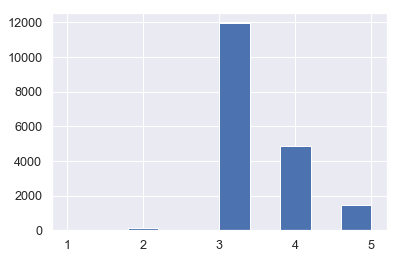

In [12]:
df.condition.hist()

In [13]:
# Criando variáveis usando pandas

# Renovation Date  -   criando uma Dummy que coloca 0 e 1 para renovado ou não

df['renovation_date'].value_counts(dropna=False).head()




0       17661
2014       77
2003       34
2013       33
2007       30
Name: renovation_date, dtype: int64

In [14]:
df['dummy_reforma'] = np.where(df['renovation_date']>0, 1, 0)

In [15]:
# Tempo desde a ultima reforma
data_maxima = df['renovation_date'].max()

In [16]:
def subtracao(row):
    if row['renovation_date'] == 0:
        return 99
    else:
        return (data_maxima - row['renovation_date'])
df['tempo_ultima_reforma'] = df.apply(subtracao, axis=1)

In [17]:
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650,0,99.0
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639,1,24.0
2,2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062,0,99.0
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000,0,99.0
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503,0,99.0


In [18]:
# Criando uma coluna recent_year que traz o ano do imóvel, e, se foi renovado, o ano da renovação

def ano_atual(row):
    if row['renovation_date'] == 0:
        return row['year_built']
    else:
        return row['renovation_date']
    
df['recent_year'] = df.apply(ano_atual, axis = 1)

In [19]:
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,recent_year
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650,0,99.0,1955.0
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639,1,24.0,1991.0
2,2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062,0,99.0,1933.0
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000,0,99.0,1965.0
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503,0,99.0,1987.0


In [20]:
df['recent_year'].value_counts().head()

2014.0    545
2006.0    401
2005.0    401
2003.0    400
2004.0    399
Name: recent_year, dtype: int64

In [21]:
# criando a variável existence_year que subtrai a data mais recente do dataset pela recent_year

df['existence_year'] = df['recent_year'].max() - df['recent_year']
df["existence_year"].value_counts(dropna=False).head()

1.0     545
10.0    401
9.0     401
12.0    400
11.0    399
Name: existence_year, dtype: int64

In [22]:
# deletando as colunas antigas

df = df.drop(columns=["year_built","renovation_date"])

In [23]:
df.head()

,rowid,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,recent_year,existence_year
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,98178,47.511234,-122.256775,1340,5650,0,99.0,1955.0,60.0
1,1,538000,3,2.25,2570,7242,2.0,0,3,400,98125,47.721023,-122.318862,1690,7639,1,24.0,1991.0,24.0
2,2,180000,2,1.00,770,10000,1.0,0,3,0,98028,47.737927,-122.233196,2720,8062,0,99.0,1933.0,82.0
3,3,604000,4,3.00,1960,5000,1.0,0,5,910,98136,47.520820,-122.393185,1360,5000,0,99.0,1965.0,50.0
4,4,510000,3,2.00,1680,8080,1.0,0,3,0,98074,47.616812,-122.044901,1800,7503,0,99.0,1987.0,28.0


In [24]:
df.corr()['price'].sort_values(ascending=False)

price                       1.000000
size_house                  0.705586
avg_size_neighbor_houses    0.584300
num_bath                    0.528921
size_basement               0.324620
num_bed                     0.308478
latitude                    0.306535
is_waterfront               0.276230
num_floors                  0.259003
dummy_reforma               0.127768
recent_year                 0.106434
size_lot                    0.090731
avg_size_neighbor_lot       0.083773
condition                   0.034974
rowid                       0.023700
longitude                   0.022048
zip                        -0.049826
existence_year             -0.106434
tempo_ultima_reforma       -0.133990
Name: price, dtype: float64

In [25]:
#Tratando a variavel zip
df['zip'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zip, dtype: int64

In [26]:
df['newcep'] = df.zip.astype(str).str[:4]
df['newcep'].head(5)

0    9817
1    9812
2    9802
3    9813
4    9807
Name: newcep, dtype: object

In [27]:
for cep in df.zip.unique():
    temp = df[df.zip == cep]
    print (cep, temp['price'].mean())

98178 315361.33928571426
98125 469874.41456582636
98028 456294.76271186443
98136 554923.0575221239
98074 685753.3164893617
98053 680962.6520467836
98003 291310.82157676347
98146 359635.6907630522
98038 364155.00396825396
98007 607545.8031496063
98115 627342.6868686868
98107 584841.8873873873
98126 423354.8181818182
98019 429245.1055900621
98103 590775.65234375
98002 232699.67455621302
98133 388978.5419664269
98040 1197649.9917695473
98092 338014.44701986754
98030 295416.52702702704
98119 864284.0066225166
98027 613300.1392045454
98117 579698.489539749
98058 356041.0129533679
98001 276856.35782747605
98166 469213.5898617511
98023 285712.1864801865
98056 422143.3604651163
98105 862116.6395939087
98042 309474.0
98008 658332.3703703703
98059 488769.1582914573
98148 280923.9583333333
98122 638669.6396761134
98144 595277.9117647059
98004 1384041.1278195488
98005 815354.6293706293
98034 520493.8595387841
98116 619534.1993006993
98010 433683.9880952381
98118 423394.1865168539
98199 799920.5427

In [28]:
df_zip = df.groupby(['zip']).agg({'size_house':'mean'})
df_zip.head()

,size_house
zip,
98001,1883.990415
98002,1616.218935
98003,1897.203320
98004,2945.601504
98005,2653.167832


In [29]:
df = pd.merge(df, df_zip, how='inner', left_on='zip', right_index=True)

In [30]:
df.head()

,rowid,price,num_bed,num_bath,size_house_x,size_lot,num_floors,is_waterfront,condition,size_basement,...,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,dummy_reforma,tempo_ultima_reforma,recent_year,existence_year,newcep,size_house_y
0,0,221900,3,1.00,1180,5650,1.0,0,3,0,...,47.511234,-122.256775,1340,5650,0,99.0,1955.0,60.0,9817,1744.0625
100,100,205425,2,1.00,880,6780,1.0,0,4,0,...,47.500909,-122.247815,1190,6780,0,99.0,1945.0,70.0,9817,1744.0625
108,108,445000,3,2.25,2100,8201,1.0,0,3,480,...,47.509077,-122.243609,2660,8712,0,99.0,1967.0,48.0,9817,1744.0625
230,230,236000,3,1.00,1300,5898,1.0,0,3,0,...,47.505342,-122.255356,1320,7619,0,99.0,1961.0,54.0,9817,1744.0625
237,237,170000,2,1.00,860,5265,1.0,0,3,0,...,47.504765,-122.272166,1650,8775,0,99.0,1931.0,84.0,9817,1744.0625


In [31]:
df.shape

(18448, 21)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rowid,18448.0,9223.500000,5325.623219,0.000000,4611.750000,9223.500000,13835.250000,1.844700e+04
price,18448.0,542362.371314,372013.519039,78000.000000,321837.500000,450000.000000,648000.000000,7.700000e+06
num_bed,18448.0,3.372615,0.933892,0.000000,3.000000,3.000000,4.000000,3.300000e+01
num_bath,18448.0,2.118888,0.772384,0.000000,1.750000,2.250000,2.500000,8.000000e+00
size_house_x,18448.0,2083.940915,921.416218,290.000000,1430.000000,1920.000000,2560.000000,1.354000e+04
size_lot,18448.0,15036.024068,41814.548966,520.000000,5050.000000,7600.500000,10625.250000,1.651359e+06
num_floors,18448.0,1.494606,0.540806,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,18448.0,0.007643,0.087092,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,18448.0,3.411698,0.652593,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,18448.0,293.571498,443.607503,0.000000,0.000000,0.000000,570.000000,4.820000e+03


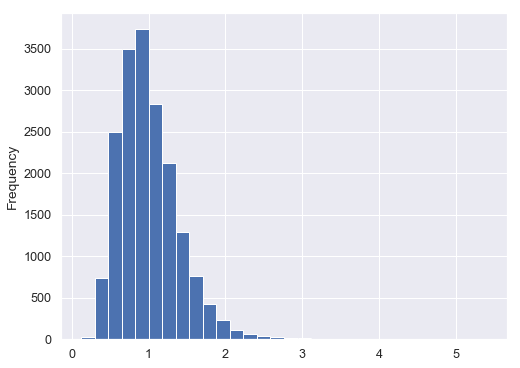

In [33]:
# Criando uma coluna que compara quao maior a casa é do tamanho médio da vizinhança: size_house_x/size_house_y

df['indice_invejinha'] = df['size_house_x'] / df['size_house_y']

df['indice_invejinha'].plot.hist(bins=30, figsize=(8,6))

In [34]:
df.corr()['price'].sort_values(ascending=False)

price                       1.000000
size_house_x                0.705586
avg_size_neighbor_houses    0.584300
indice_invejinha            0.535581
num_bath                    0.528921
size_house_y                0.444631
size_basement               0.324620
num_bed                     0.308478
latitude                    0.306535
is_waterfront               0.276230
num_floors                  0.259003
dummy_reforma               0.127768
recent_year                 0.106434
size_lot                    0.090731
avg_size_neighbor_lot       0.083773
condition                   0.034974
rowid                       0.023700
longitude                   0.022048
zip                        -0.049826
existence_year             -0.106434
tempo_ultima_reforma       -0.133990
Name: price, dtype: float64

In [35]:
#Tratando a heterocedasticidade entre price e size_house_x com log

df[['size_house_x', 'price']].corr()

,size_house_x,price
size_house_x,1.000000,0.705586
price,0.705586,1.000000


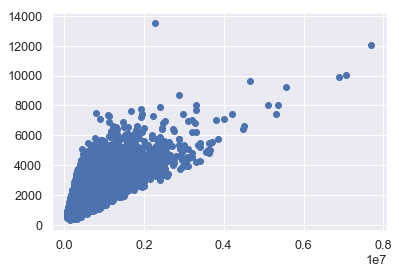

In [36]:
plt.scatter(df['price'], df['size_house_x'])


 mu = 542362.37 and sigma = 372003.44



Text(0.5, 1.0, 'Price distribution')

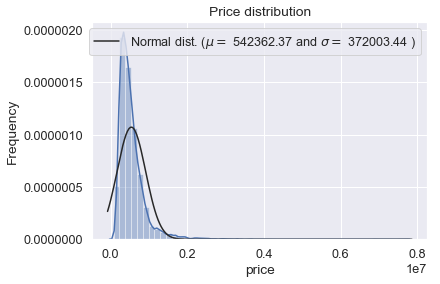

In [37]:
sns.distplot(df['price'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

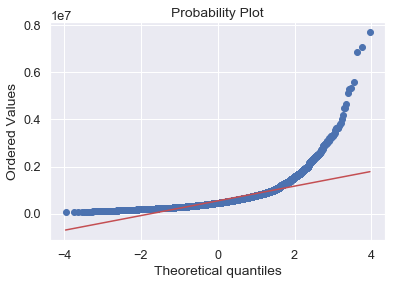

In [38]:
# Plotando o gráfico de probabilidade dos preços das casas
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()


 mu = 2083.94 and sigma = 921.39



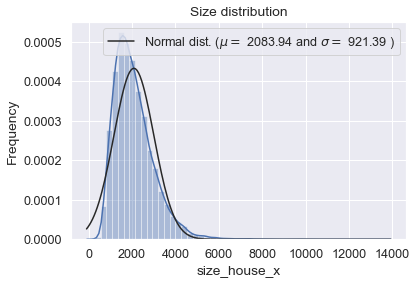

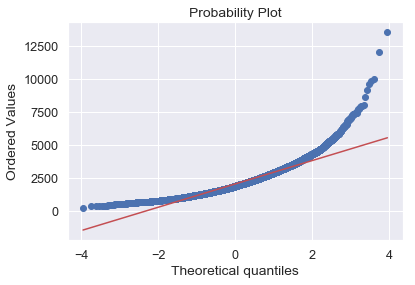

In [39]:
sns.distplot(df['size_house_x'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df['size_house_x'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Size distribution')

fig = plt.figure()
res = stats.probplot(df['size_house_x'], plot=plt)
plt.show()

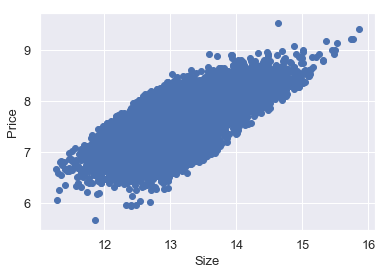

In [40]:
# Aplicando o log...

plt.scatter(np.log(df['price']), np.log(df['size_house_x']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('Size', fontsize=13)
plt.show()


 mu = 13.05 and sigma = 0.53



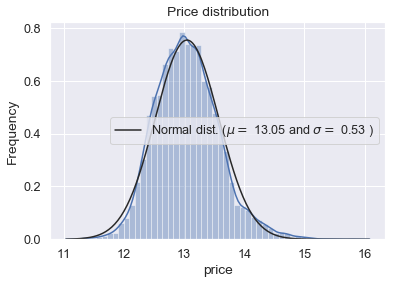

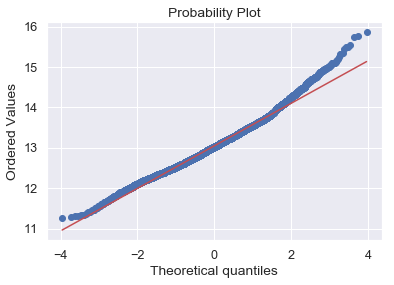

In [41]:
sns.distplot(np.log(df['price']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(df['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(np.log(df['price']), plot=plt)
plt.show()


 mu = 7.55 and sigma = 0.42



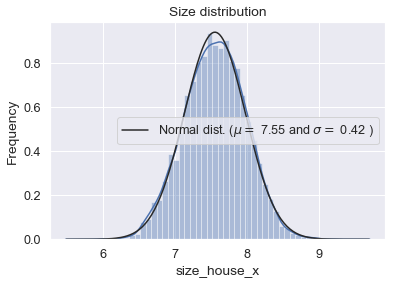

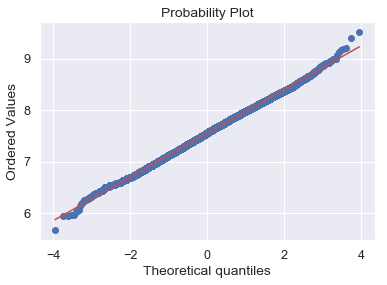

In [42]:
sns.distplot(np.log(df['size_house_x']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(df['size_house_x']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Size distribution')

fig = plt.figure()
res = stats.probplot(np.log(df['size_house_x']), plot=plt)
plt.show()


 mu = 1988.31 and sigma = 686.15



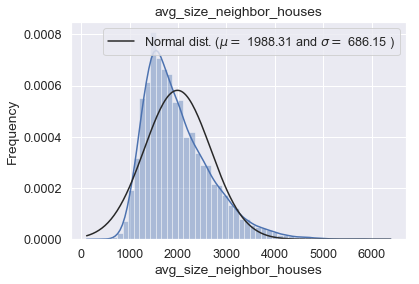

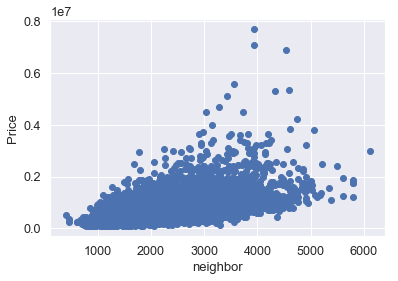

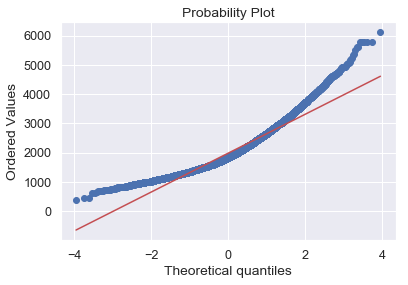

In [43]:
# Aplicando log na average_size_neighbor_house

# Plotando o gráfico de distribuição dos tamanhos médios das casas da vizinhança com a aproximação da curva normal

sns.distplot(df['avg_size_neighbor_houses'] , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df['avg_size_neighbor_houses'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('avg_size_neighbor_houses')

# Gráfico de dispersão dos tamanhos médios das cadas da vizinhança pelo preço
fig, ax = plt.subplots()
ax.scatter(x = df['avg_size_neighbor_houses'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

# Gráfico de probabilidades dos tamanhos médios das cadas da vizinhança
res1 = stats.probplot(df['avg_size_neighbor_houses'], plot=plt)
plt.show()


 mu = 7.54 and sigma = 0.33



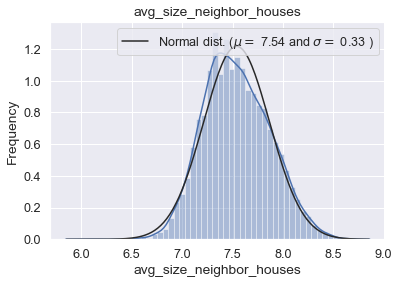

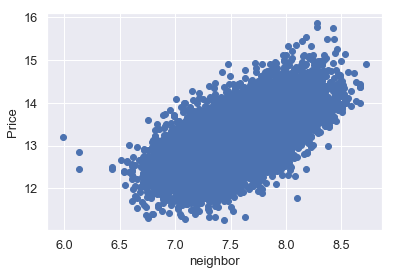

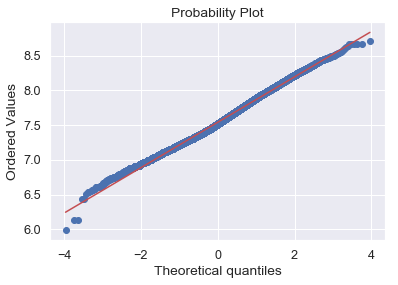

In [44]:
# Gráfico de distribuição com LOG aos tamanhos médios das cadas da vizinhança
sns.distplot(np.log(df['avg_size_neighbor_houses']) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(np.log(df['avg_size_neighbor_houses']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('avg_size_neighbor_houses')

# Gráfico de dispersão dos tamanhos médios das cadas da vizinhança pelo preço
fig, ax = plt.subplots()
ax.scatter(x = np.log(df['avg_size_neighbor_houses']), y = np.log(df['price']))
plt.ylabel('Price', fontsize=13)
plt.xlabel('neighbor', fontsize=13)
plt.show()

#Gráfico de probabilidades dos tamanhos médios das cadas da vizinhança
res2 = stats.probplot(np.log(df['avg_size_neighbor_houses']), plot=plt)
plt.show()

In [45]:
# Escolhendo variáveis para aplicação do log. Se a distribuição é assimétrica (na distribução normal a assimetria = 0) 
# ou possui uma curtose muito deferente de 3, ela é uma boa candidata ao tratamento

# Calculando a assimetria (skew) para as variáveis independentes e colocando em um DataFrame

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
size_lot,13.396166
is_waterfront,11.306838
avg_size_neighbor_lot,9.059845
dummy_reforma,4.526088
price,4.115432
num_bed,2.216423
size_basement,1.570224
size_house_x,1.502484
indice_invejinha,1.253267
avg_size_neighbor_houses,1.100440


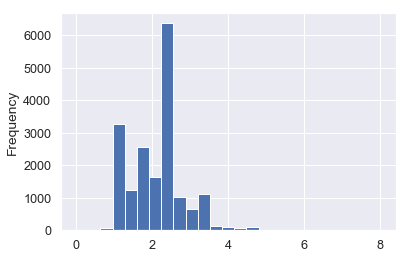

In [46]:
# Variáveis categóricas - dummies


# Variável número de banheiros na casa

df.num_bath.plot.hist(bins=25)

In [47]:
df.num_bath.value_counts()

2.50    4607
1.00    3278
1.75    2576
2.25    1764
2.00    1642
1.50    1232
2.75    1012
3.00     648
3.50     618
3.25     514
3.75     140
4.00     111
4.50      88
4.25      67
0.75      57
4.75      19
5.00      16
5.25      13
5.50      10
0.00       7
1.25       6
6.00       6
5.75       4
0.50       3
8.00       2
6.50       2
6.75       2
6.25       2
7.50       1
7.75       1
Name: num_bath, dtype: int64

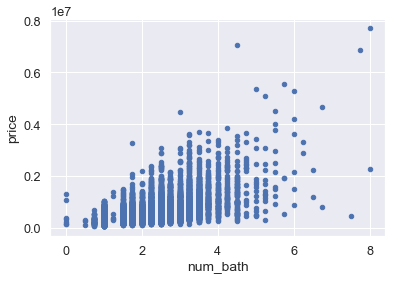

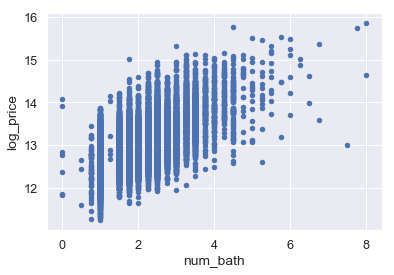

In [48]:
# Criando uma coluna com o LOG dos preços das casas

df['log_price'] = np.log1p(df['price'])

# Comparando graficamente a distribuição do número de banheiros das casas pelo preço

df.plot.scatter(x='num_bath', y='price')

df.plot.scatter(x='num_bath', y='log_price')

In [49]:
# Regressão simples do número de banheiros pelo preço das casas

function2 = '''
price ~ num_bath
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary2())

                   Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.280      
Dependent Variable:   price            AIC:                519555.5044
Date:                 2019-05-24 13:40 BIC:                519571.1498
No. Observations:     18448            Log-Likelihood:     -2.5978e+05
Df Model:             1                F-statistic:        7165.      
Df Residuals:         18446            Prob (F-statistic): 0.00       
R-squared:            0.280            Scale:              9.9683e+10 
----------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------
Intercept   2572.7382 6787.5281  0.3790 0.7047 -10731.4453  15876.9217
num_bath  254751.3486 3009.6330 84.6453 0.0000 248852.1891 260650.5080
----------------------------------------------------------------------
Omnibus:              1504

In [50]:
# Regressão simples do número de banheiros pelo LOG do preço das casas

function2 = '''
np.log1p(price) ~ num_bath
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.308     
Dependent Variable: np.log1p(price)  AIC:                22082.8820
Date:               2019-05-24 13:40 BIC:                22098.5274
No. Observations:   18448            Log-Likelihood:     -11039.   
Df Model:           1                F-statistic:        8197.     
Df Residuals:       18446            Prob (F-statistic): 0.00      
R-squared:          0.308            Scale:              0.19380   
--------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     12.2453    0.0095  1293.8893  0.0000  12.2268  12.2639
num_bath       0.3799    0.0042    90.5357  0.0000   0.3717   0.3881
-------------------------------------------------------------------
Omnibus:              175.263       Durbin-Watson:          0

In [51]:
# Rodando uma regressão com o número de banheiros como DUMMIES pelo preço das casas

function2 = '''
price ~ C(num_bath)
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary2())

                           Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.361      
Dependent Variable:        price                 AIC:                     517368.6812
Date:                      2019-05-24 13:40      BIC:                     517603.3625
No. Observations:          18448                 Log-Likelihood:          -2.5865e+05
Df Model:                  29                    F-statistic:             360.7      
Df Residuals:              18418                 Prob (F-statistic):      0.00       
R-squared:                 0.362                 Scale:                   8.8406e+10 
-------------------------------------------------------------------------------------
                       Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------------
Intercept            520371.1429 112380.4719  4.6304 0.0000  300094.9897  740647.

In [52]:
# Rodando uma regressão com o número de banheiros como DUMMIES pelo preço das casas

function2 = '''
np.log1p(price) ~ C(num_bath)
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.321     
Dependent Variable: np.log1p(price)  AIC:                21743.3338
Date:               2019-05-24 13:40 BIC:                21978.0152
No. Observations:   18448            Log-Likelihood:     -10842.   
Df Model:           29               F-statistic:        302.1     
Df Residuals:       18418            Prob (F-statistic): 0.00      
R-squared:          0.322            Scale:              0.18997   
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           12.8127   0.1647 77.7754 0.0000 12.4897 13.1356
C(num_bath)[T.0.5]  -0.5792   0.3008 -1.9256 0.0542 -1.1687  0.0104
C(num_bath)[T.0.75] -0.3363   0.1746 -1.9263 0.0541 -0.6784  0.0059
C(num_bath)[T.1.0]  -0.1517   0.1649 -0.9198 0.3577 -0.4749  0.171

In [53]:
# Calculando as correlações entre os preços, LOG de preços e número de banheiros

df[['price', 'log_price', 'num_bath']].corr().round(2)

,price,log_price,num_bath
price,1.00,0.89,0.53
log_price,0.89,1.00,0.55
num_bath,0.53,0.55,1.00


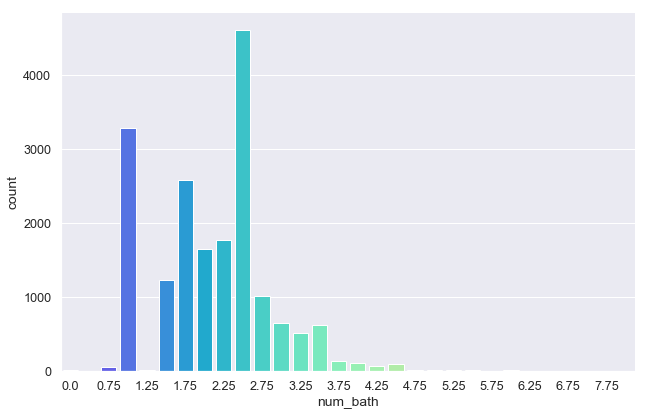

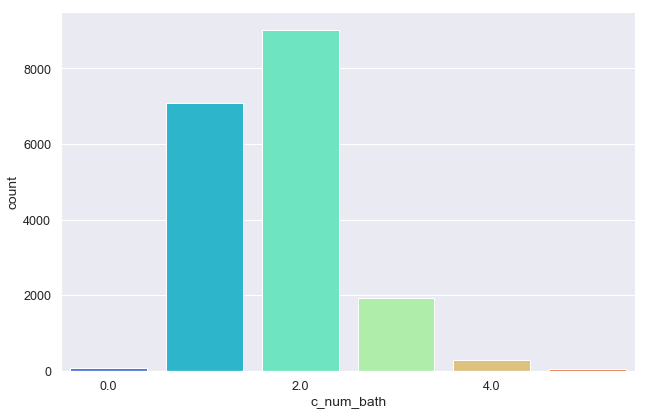

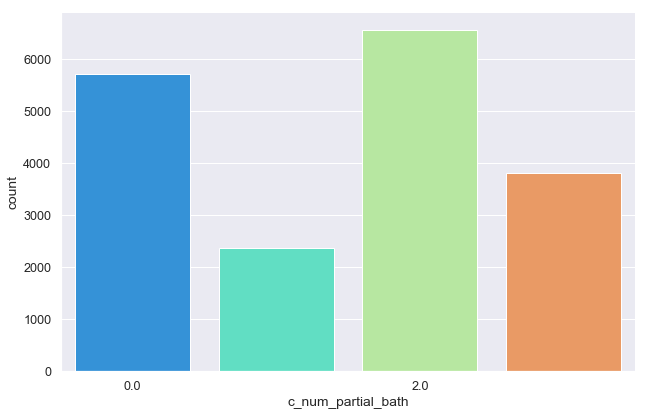

In [54]:
# Plotando o gráfico de distribuição do número de banheiros
g = sns.factorplot(x="num_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)


# Criando uma nova DUMMY para o número de banheiros e plotando a distribuição
df['c_num_bath'] = df.num_bath.replace({0:0, 0.50:0, 0.75:0,
                                          1:1, 1.25:1, 1.50:1, 1.75:1,
                                          2:2, 2.25:2, 2.50:2, 2.75:2,
                                          3:3, 3.25:3, 3.50:3, 3.75:3,
                                          4:4, 4.25:4, 4.50:4, 4.75:4,
                                          5:5, 5.25:5, 5.50:5, 5.75:5,
                                          6:5, 6.25:5, 6.50:5, 6.75:5,
                                          7:5, 7.25:5, 7.50:5, 7.75:5,
                                          8:5})

g = sns.factorplot(x="c_num_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)


# Criando uma nova DUMMY para o número de banheiros PARCIAIS e plotando a distribuição
df['c_num_partial_bath'] = df.num_bath.replace({0:0, 0.25:1, 0.50:2, 0.75:3,
                                                  1:0, 1.25:1, 1.50:2, 1.75:3,
                                                  2:0, 2.25:1, 2.50:2, 2.75:3,
                                                  3:0, 3.25:1, 3.50:2, 3.75:3,
                                                  4:0, 4.25:1, 4.50:2, 4.75:3,
                                                  5:0, 5.25:1, 5.50:2, 5.75:3,
                                                  6:0, 6.25:1, 6.50:2, 6.75:3,
                                                  7:0, 7.25:1, 7.50:2, 7.75:3,
                                                  8:0})

g = sns.factorplot(x="c_num_partial_bath", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)

g.set_xticklabels(step=2)

In [55]:
function2 = '''
np.log1p(price) ~ C(c_num_bath) + C(c_num_partial_bath) 
'''

model2 = smf.ols(function2, df).fit()
print(model2.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.316     
Dependent Variable:     np.log1p(price)     AIC:                   21861.5600
Date:                   2019-05-24 13:40    BIC:                   21931.9644
No. Observations:       18448               Log-Likelihood:        -10922.   
Df Model:               8                   F-statistic:           1067.     
Df Residuals:           18439               Prob (F-statistic):    0.00      
R-squared:              0.316               Scale:                 0.19141   
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                    12.2165   0.0540 226.0230 0.0000 12.1105 12.3224
C(c_num_bath)[T.1.0]          0.4258   0.0539   7.9041 0.0000  0.3202  0.5313
C(c_num_b

In [56]:
# Trabalhando a variável número de quartos

df['num_bed'].value_counts()

3     8403
4     5863
2     2358
5     1361
6      238
1      157
7       34
8       12
0       12
9        6
10       3
33       1
Name: num_bed, dtype: int64

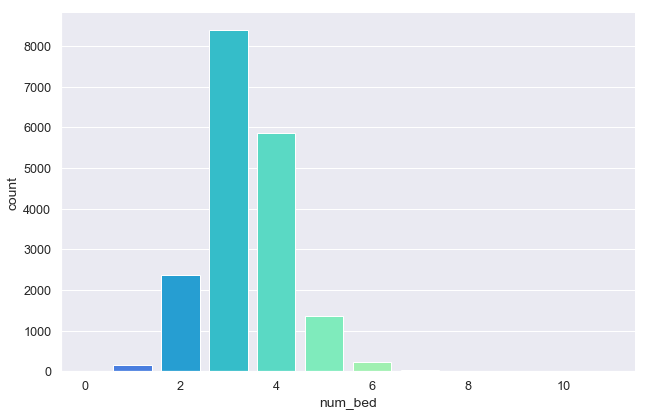

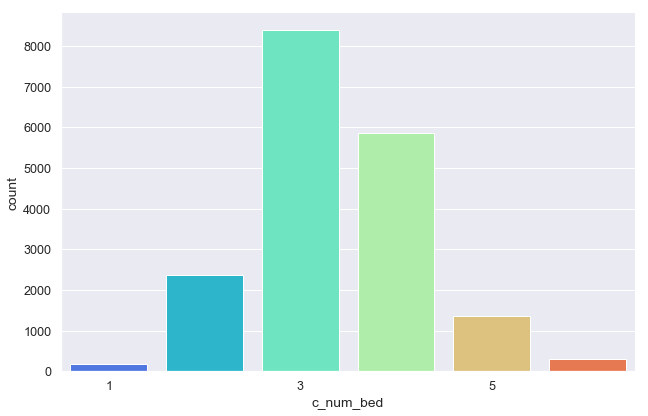

In [57]:
# Plotando um gráfico de distribuição para o número de quartos
g = sns.factorplot(x="num_bed", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)


# Criando uma DUMMY para o número de quartos que explique melhor o preço das casas
df['c_num_bed'] = df.num_bed.replace({ 0:1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:6, 8:6, 9:6, 10:6, 33:6})

g = sns.factorplot(x="c_num_bed", data=df, kind="count",
                   palette="rainbow", size=6, aspect=1.5)
g.set_xticklabels(step=2)

In [58]:
function3 = ''' log_price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
+ is_waterfront
+ condition
+ size_basement
+ zip
+ latitude
+ longitude
+ avg_size_neighbor_houses
+ avg_size_neighbor_lot
+ dummy_reforma
+ tempo_ultima_reforma
+ recent_year
+ existence_year
+ newcep
+ size_house_y
+ indice_invejinha
+ c_num_bath
+ c_num_partial_bath
+ c_num_bed
'''

model3 = smf.ols(function3, df).fit()
print(model3.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.819     
Dependent Variable:   log_price          AIC:                  -2592.7551
Date:                 2019-05-24 13:40   BIC:                  -2279.8466
No. Observations:     18448              Log-Likelihood:       1336.4    
Df Model:             39                 F-statistic:          2136.     
Df Residuals:         18408              Prob (F-statistic):   0.00      
R-squared:            0.819              Scale:                0.050763  
-------------------------------------------------------------------------
                          Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                 0.0002   0.0000   3.8267 0.0001  0.0001  0.0002
newcep[T.9801]           -0.2404   0.0138 -17.3729 0.0000 -0.2676 -0.2133
newcep[T.9802]            0.0040   0.0188   0.2112 0.8328 -

In [59]:
function5 = ''' price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
'''

model5 = smf.ols(function5, df).fit()
print(model5.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.513      
Dependent Variable:   price              AIC:                  512327.2100
Date:                 2019-05-24 13:40   BIC:                  512374.1462
No. Observations:     18448              Log-Likelihood:       -2.5616e+05
Df Model:             5                  F-statistic:          3892.      
Df Residuals:         18442              Prob (F-statistic):   0.00       
R-squared:            0.513              Scale:                6.7353e+10 
--------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------
Intercept     73854.9052 8381.2485   8.8119 0.0000  57426.8817  90282.9287
num_bed      -60165.8754 2552.1073 -23.5750 0.0000 -65168.2420 -55163.5088
num_bath       7647.3825 4153.0316   1.8414 0.0

In [60]:
model5.predict()

array([ 272730.37615053,  237136.66958703,  573942.64667596, ...,
       1143020.84355984,  891526.04224358, 1445735.50421465])

In [61]:
df['yhat'] = model5.predict()
df['yhat']

0        2.727304e+05
100      2.371367e+05
108      5.739426e+05
230      3.108004e+05
237      2.312839e+05
290      4.545427e+05
296      1.548395e+05
297      1.548395e+05
358      5.997065e+05
398      4.717096e+05
442      1.579121e+05
502      4.309965e+05
528      2.025330e+05
613      5.937836e+05
865      2.950660e+05
913      4.911566e+05
917      3.209780e+05
957      4.353476e+05
967      2.707226e+05
977      6.237903e+05
1160     3.138198e+05
1195     2.473972e+05
1202     8.672449e+05
1273     9.496681e+05
1367     5.748665e+05
1522     4.421522e+05
1529     4.508881e+05
1547     6.165317e+05
1689     5.876427e+05
1696     2.227213e+05
             ...     
10194    1.307338e+06
10493    6.341135e+05
10932    3.442296e+05
11273    1.009272e+06
11299    1.270752e+06
11419    9.018887e+05
11592    8.750036e+05
11905    7.150063e+05
11954    1.256393e+06
12126    1.173945e+06
12241    1.031969e+06
12583    8.963967e+05
12779    1.159142e+06
12988    1.383150e+06
13324    1

In [62]:
df[['yhat', 'price']].corr()

,yhat,price
yhat,1.000000,0.716556
price,0.716556,1.000000


In [63]:
np.sqrt(model5.rsquared)

0.7165562102796935

In [64]:
df['erro'] = df['yhat'] - df['price']

In [65]:
from sklearn import metrics
mean_squared_error(df.price, df.yhat), r2_score(df.price, df.yhat)

(67331591238.95684, 0.5134528024903964)

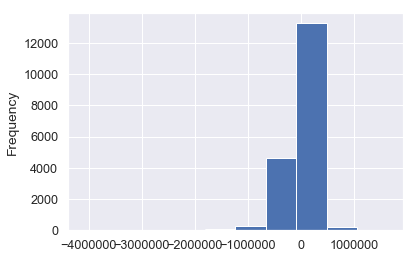

In [66]:
# Analisando o erro

df['erro'].plot.hist()

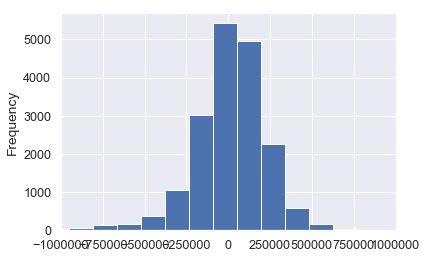

In [67]:
df['erro'].plot.hist(bins=40, xlim = (-1000000, 1000000))

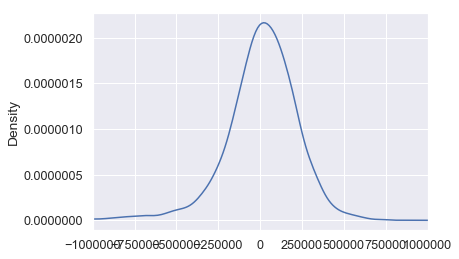

In [68]:
df['erro'].plot.kde(xlim = (-1000000, 1000000) )

In [69]:
# Normalizando o erro
# Dividindo os valores de erro pelo desvio padrão do próprio erro faz o que chamamos de Normalização dos valores do erro, 
# para entendermos quantos desvios padrão estamos afastados do valor médio. Para os erros, o valor médio sempre será zero.

df['erro_em_desvios'] = df['erro']/df['erro'].std()

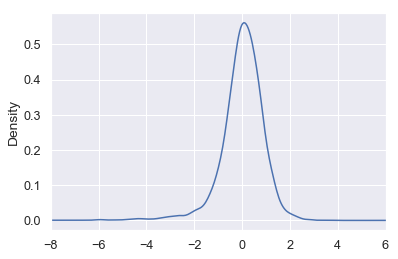

In [70]:
df['erro_em_desvios'].plot.kde(xlim = (-8, 6) )

In [71]:
df['erro_em_desvios'].mean()

2.9382273813570044e-13

In [72]:
df['erro_em_desvios'].std()

0.999999999999995

In [73]:
# Retirando outliers

# Podemos identificar que temos muitos valores extremos na distribuição dos erros, o que causa muita imprecisão. 
# A estratégia de tratamento é a remoção destes Outliers.
# Vamos começar criando uma máscara para remover os outliers com dois desvios-padrão de distância, 
# e identificar quantos valores serão removidos.

mascara_prob = (df['erro_em_desvios']<1.96) & (df['erro_em_desvios']>-1.96)

In [74]:
df.shape

(18448, 29)

In [75]:
df[~mascara_prob].shape

(727, 29)

In [76]:
df[mascara_prob].shape

(17721, 29)

In [77]:
df[mascara_prob].shape[0]/df.shape[0]

0.9605919340849957

In [78]:
# com 6 sigma

mascara_raridade_9999 = (df['erro_em_desvios']<6) & (df['erro_em_desvios']>-6)

In [79]:
df[~mascara_raridade_9999].shape[0]

48

In [80]:
# Fazendo a regrassão com o 6 sigma

function6 = ''' price ~ num_bed
+ num_bath
+ size_house_x
+ size_lot
+ num_floors
'''

model6 = smf.ols(function6, df[mascara_raridade_9999]).fit()
print(model6.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.504      
Dependent Variable:   price              AIC:                  506942.6197
Date:                 2019-05-24 13:41   BIC:                  506989.5403
No. Observations:     18400              Log-Likelihood:       -2.5347e+05
Df Model:             5                  F-statistic:          3747.      
Df Residuals:         18394              Prob (F-statistic):   0.00       
R-squared:            0.505              Scale:                5.4042e+10 
--------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------
Intercept     96020.6776 7653.9711  12.5452 0.0000  81018.1827 111023.1724
num_bed      -52637.9449 2406.0441 -21.8774 0.0000 -57354.0150 -47921.8748
num_bath       3429.9652 3739.3562   0.9173 0.3

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.523      
Dependent Variable:      price                 AIC:                     511939.7381
Date:                    2019-05-24 13:41      BIC:                     511994.4971
No. Observations:        18448                 Log-Likelihood:          -2.5596e+05
Df Model:                6                     F-statistic:             3378.      
Df Residuals:            18441                 Prob (F-statistic):      0.00       
R-squared:               0.524                 Scale:                   6.5950e+10 
-----------------------------------------------------------------------------------
                        Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
Intercept             32668.3084 31519.5742  1.0364 0.3000  -29112.9769  94449.5936
C(c_num_bath)[T.1.

Text(0.5, 1.0, 'Linear Regression')

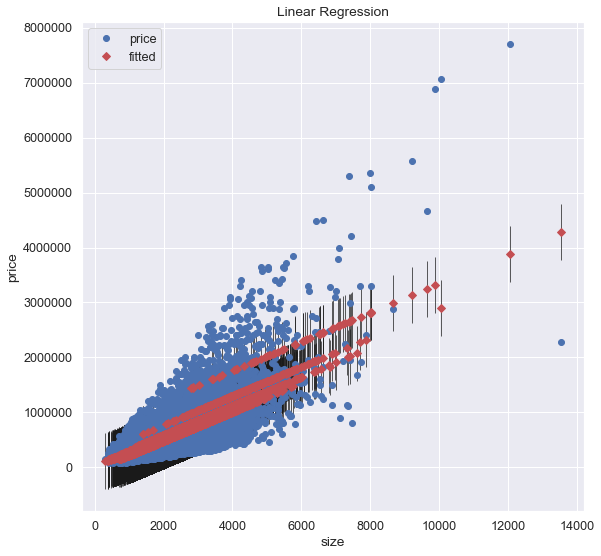

In [81]:

# Analisando a DUMMY número de banheiros através de uma regressão
# Podemos observar cada linha vermelha representando os valores preditos para cada número de banheiros

function7 = ''' price ~ size_house_x + C(c_num_bath)
'''

model7 = smf.ols(function7, df).fit()
print(model7.summary2())

import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (9,9)

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model7, 6, ax=ax) # o parâmetro 6 é o índice da variável do modelo (size_house_x)
ax.set_ylabel("price")
ax.set_xlabel("size")
ax.set_title("Linear Regression")

In [82]:
# Acionando ITERAÇÃO entre as variáveis parar capturar diferenças nas taxas de retorno

df.is_waterfront.describe()

count    18448.000000
mean         0.007643
std          0.087092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_waterfront, dtype: float64

In [83]:
df['size_x_waterfront'] = df['size_house_x'] * df['is_waterfront']

In [84]:
function8 = ''' log_price ~ size_house_x + is_waterfront + size_x_waterfront'''

model8 = smf.ols(function8, df).fit()
print(model8.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.499     
Dependent Variable: log_price        AIC:                16126.7469
Date:               2019-05-24 13:53 BIC:                16158.0378
No. Observations:   18448            Log-Likelihood:     -8059.4   
Df Model:           3                F-statistic:        6119.     
Df Residuals:       18444            Prob (F-statistic): 0.00      
R-squared:          0.499            Scale:              0.14031   
-------------------------------------------------------------------
                   Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         12.2204   0.0069 1769.6304 0.0000 12.2068 12.2339
size_house_x       0.0004   0.0000  129.8690 0.0000  0.0004  0.0004
is_waterfront      0.8323   0.0710   11.7186 0.0000  0.6931  0.9715
size_x_waterfront -0.0001   0.0000   -3.2287 0.0012 -0.0001 -0.000

Text(0.5, 1.0, 'Linear Regression')

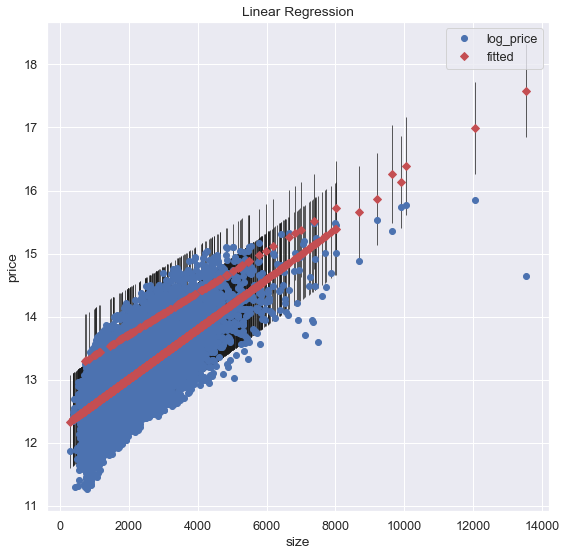

In [85]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model8, 1, ax=ax)
ax.set_ylabel("price")
ax.set_xlabel("size")
ax.set_title("Linear Regression")

In [91]:
model6.params

Intercept       96020.677552
num_bed        -52637.944885
num_bath         3429.965196
size_house_x      287.116186
size_lot           -0.237086
num_floors      10827.125591
dtype: float64

Text(0.5, 1.0, 'Linear Regression')

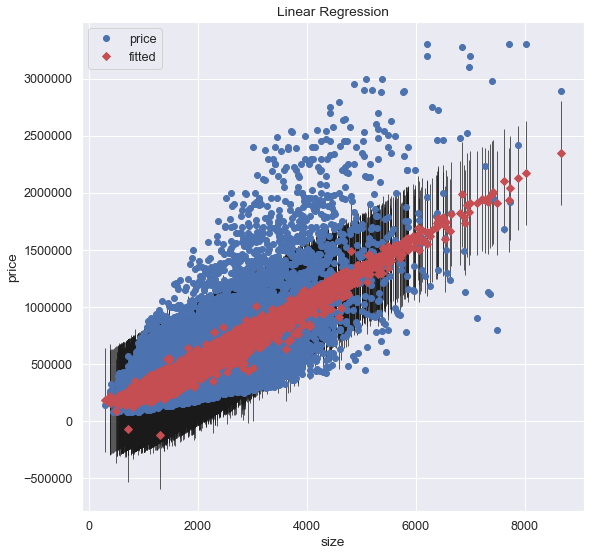

In [92]:
import statsmodels.api as sm

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model6, 3, ax=ax)
ax.set_ylabel("price")
ax.set_xlabel("size")
ax.set_title("Linear Regression")

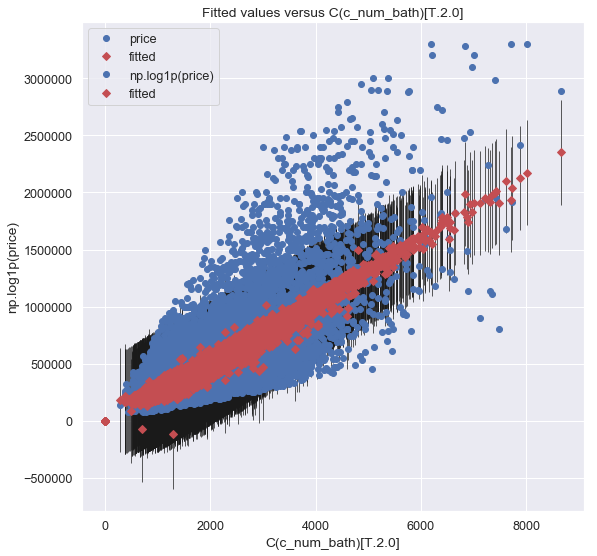

In [93]:
sm.graphics.plot_fit(model2, 2, ax=ax)

In [94]:
model2.params

Intercept                       12.216481
C(c_num_bath)[T.1.0]             0.425755
C(c_num_bath)[T.2.0]             0.732983
C(c_num_bath)[T.3.0]             1.217992
C(c_num_bath)[T.4.0]             1.667899
C(c_num_bath)[T.5.0]             2.063667
C(c_num_partial_bath)[T.1.0]     0.154266
C(c_num_partial_bath)[T.2.0]     0.184745
C(c_num_partial_bath)[T.3.0]     0.324305
dtype: float64

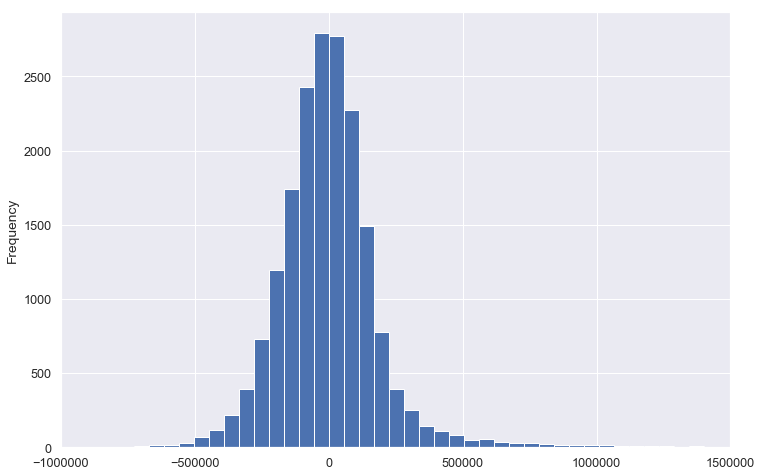

In [95]:
# Teste de normalidade do erro para o Modelo 1¶
model1.resid.plot.hist(figsize=(12,8), bins=100, xlim=(-1000000,1500000))

In [96]:
model1.predict()

array([160371.48997293, 866165.62844658, 486645.11351714, ...,
       135547.18387837, 314964.68969842, 137605.73744192])

In [97]:
df['price'].values

array([ 221900,  205425,  445000, ..., 1950000, 2250000, 2900000],
      dtype=int64)

In [98]:
results = list(zip(model1.predict(),df['price'].values))

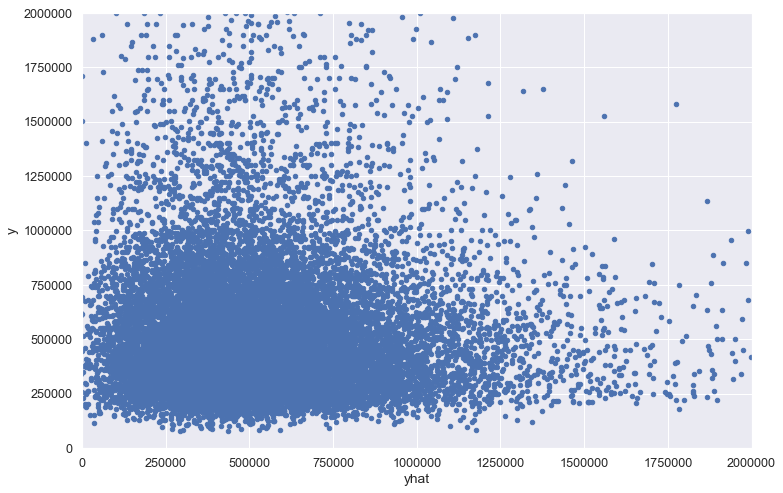

In [99]:
pd.DataFrame(results, columns=['yhat', 'y']).plot.scatter(x='yhat', y='y', figsize=(12,8), xlim=(0,2000000), ylim=(0,2000000))